In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("dam_data_final.csv", low_memory=False)
df.head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'dam_data_final.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76279 entries, 0 to 76278
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       76279 non-null  object 
 1   dam_name                   76279 non-null  object 
 2   full_depth                 76279 non-null  float64
 3   full_capacity              76279 non-null  object 
 4   current_level              76278 non-null  object 
 5   current_storage            76278 non-null  float64
 6   current_inflow             73894 non-null  object 
 7   current_outflow            73861 non-null  object 
 8   Last Year Level(Feet)      76278 non-null  object 
 9   Last Year Storage(M.Cft.)  76278 non-null  float64
dtypes: float64(3), object(7)
memory usage: 5.8+ MB


In [4]:
features_to_drop = [
    "Last Year Level(Feet)",
    "Last Year Storage(M.Cft.)"
]

df = df.drop(columns=features_to_drop)

In [5]:
df.head()

,date,dam_name,full_depth,full_capacity,current_level,current_storage,current_inflow,current_outflow
0,2015-01-01,METTUR,120.0,93470,96.91,60914.0,65,1002
1,2015-01-01,Thirumurthy,60.0,1744,45.66,1164.0,66,21
2,2015-01-01,Aliyar,120.0,3864,105.7,2892.0,51,430
3,2015-01-01,Parambikulam,72.0,13454,69.57,12899.0,270,640
4,2015-01-01,Sholayar,160.0,5046,123.37,3217.0,115,170


In [6]:
# 1 checking feature with missing values
feature_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
# 2 getting the features with missing value percentage
for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4),  " % missing value")

current_inflow 0.0313  % missing value
current_outflow 0.0317  % missing value


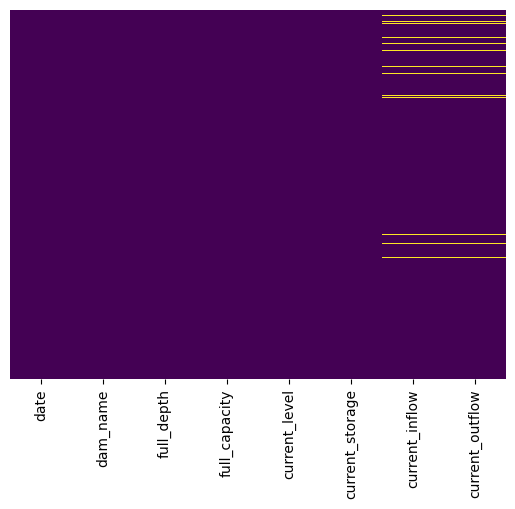

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

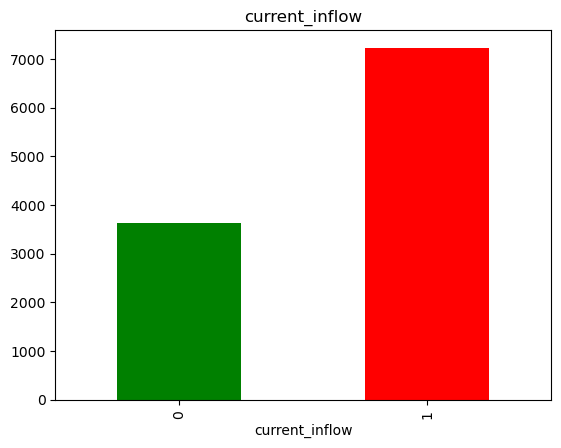

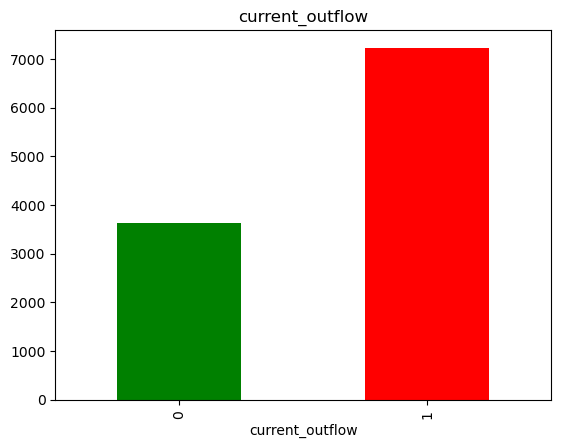

In [8]:
for feature in feature_with_na:
    data=df.copy()    # to avoid change in main data

    # making a variable that indicates 1 if the observation was missing or 0 if observation is not missing
    data[feature]=np.where(data[feature].isnull(),1,0)

    # feature with nan value are 1
    # featue without nan value are 0
    data.groupby(feature)["current_storage"].median().plot.bar(color=("Green","Red"))
    plt.title(feature)
    plt.show()

In [9]:
# checking the numerical variables:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('number of numerical valriables ',len(numerical_feature))
df[numerical_feature].head()

number of numerical valriables  2


,full_depth,current_storage
0,120.0,60914.0
1,60.0,1164.0
2,120.0,2892.0
3,72.0,12899.0
4,160.0,3217.0


In [10]:
# finding temproal variable
temproal_variable=[f for f in df.columns if 'date' in f]
df[temproal_variable].head()

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01


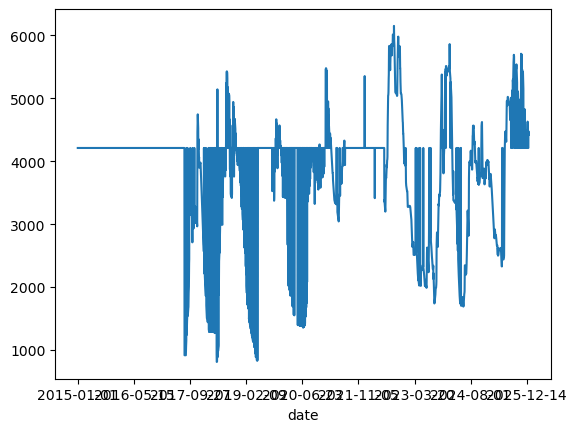

In [11]:
# find the relation ship between date and current storage of different dam
df.groupby(['date'])['current_storage'].median().plot()
plt.show()

In [12]:
df['dam_name'].unique()

array(['METTUR', 'Thirumurthy', 'Aliyar', 'Parambikulam', 'Sholayar',
       'Sathanur', 'Perunchani', 'Pechiparai', 'Manimuthar',
       'Krishnagiri', 'Vaigai', 'Papanasam          (TN EB Dam)',
       'Kabini', 'Harangi', 'Hemavathy', 'Krishna Raja Sagar',
       'AMARAVATHI*', 'Periyar**', 'BHAVANISAGAR', 'Papanasam',
       'Hemavathy - karnataka', 'Harangi - karnataka',
       'Kabini -karnataka', 'Krishna Raja Sagar - karnataka',
       'Krishna Raja Sagar - Karnataka', 'Kabini  - Karnataka',
       'Hemavathy  - Karnataka', 'Harangi  - Karnataka'], dtype=object)

In [13]:
import re

df['dam_name'] = df['dam_name'].apply(
    lambda x: re.sub(r'\s*\(.*?\)|[*]+', '', x)
)




In [14]:
df['dam_name'] = df['dam_name'].str.replace(
    r'\s*-\s* - karnataka', '', regex=True
)

In [15]:

df['dam_name'].unique()

array(['METTUR', 'Thirumurthy', 'Aliyar', 'Parambikulam', 'Sholayar',
       'Sathanur', 'Perunchani', 'Pechiparai', 'Manimuthar',
       'Krishnagiri', 'Vaigai', 'Papanasam', 'Kabini', 'Harangi',
       'Hemavathy', 'Krishna Raja Sagar', 'AMARAVATHI', 'Periyar',
       'BHAVANISAGAR', 'Hemavathy - karnataka', 'Harangi - karnataka',
       'Kabini -karnataka', 'Krishna Raja Sagar - karnataka',
       'Krishna Raja Sagar - Karnataka', 'Kabini  - Karnataka',
       'Hemavathy  - Karnataka', 'Harangi  - Karnataka'], dtype=object)

In [1]:
import os
os.getcwd()

'C:\\Users\\krish\\DataScience\\Dam_Water_Storage_Prediction\\ 03_EDA'